In [5]:
import pandas as pd
import numpy as np

# Contoh data kerusakan jalan
data = {
    'ruas_jalan': ['A1', 'A2', 'A3', 'B1', 'B2'],
    'retak_ringan': [5, 2, 8, 1, 0],
    'retak_sedang': [3, 4, 2, 5, 1],
    'retak_berat': [1, 0, 3, 2, 4],
    'lubang_ringan': [2, 1, 0, 3, 2],
    'lubang_berat': [0, 1, 2, 1, 3],
    'alur': [1, 0, 1, 2, 0]
}

df = pd.DataFrame(data)
print(df)

  ruas_jalan  retak_ringan  retak_sedang  retak_berat  lubang_ringan  \
0         A1             5             3            1              2   
1         A2             2             4            0              1   
2         A3             8             2            3              0   
3         B1             1             5            2              3   
4         B2             0             1            4              2   

   lubang_berat  alur  
0             0     1  
1             1     0  
2             2     1  
3             1     2  
4             3     0  


In [7]:
def calculate_sdi(row):
    # Bobot untuk setiap jenis dan tingkat kerusakan
    bobot = {
        'retak_ringan': 0.2,
        'retak_sedang': 0.5,
        'retak_berat': 0.8,
        'lubang_ringan': 0.3,
        'lubang_berat': 0.7,
        'alur': 0.4
    }
    
    sdi = 0
    for kerusakan in bobot.keys():
        sdi += row[kerusakan] * bobot[kerusakan]
    
    return sdi

# Hitung SDI untuk setiap ruas jalan
df['SDI'] = df.apply(calculate_sdi, axis=1)
print(df[['ruas_jalan', 'SDI']])

  ruas_jalan  SDI
0         A1  4.3
1         A2  3.4
2         A3  6.8
3         B1  6.7
4         B2  6.4


In [9]:
def klasifikasi_kondisi(sdi):
    if sdi < 2:
        return 'Baik'
    elif 2 <= sdi < 5:
        return 'Sedang'
    elif 5 <= sdi < 8:
        return 'Rusak Ringan'
    elif 8 <= sdi < 12:
        return 'Rusak Sedang'
    else:
        return 'Rusak Berat'

df['kondisi'] = df['SDI'].apply(klasifikasi_kondisi)
print(df[['ruas_jalan', 'SDI', 'kondisi']])

  ruas_jalan  SDI       kondisi
0         A1  4.3        Sedang
1         A2  3.4        Sedang
2         A3  6.8  Rusak Ringan
3         B1  6.7  Rusak Ringan
4         B2  6.4  Rusak Ringan


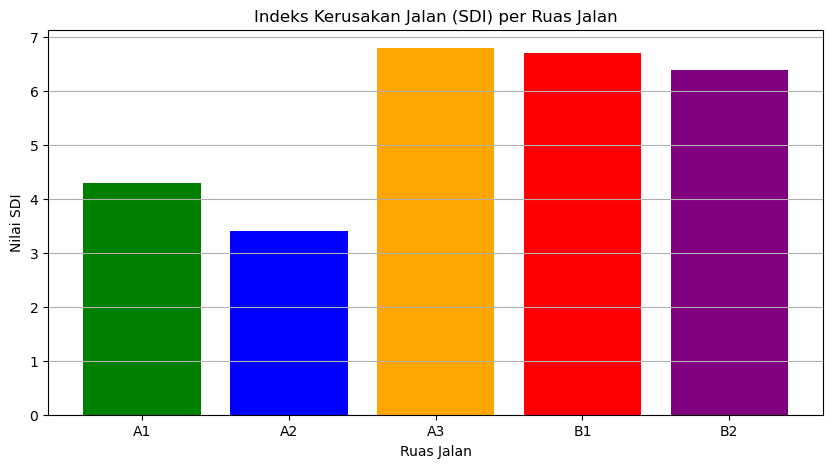

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(df['ruas_jalan'], df['SDI'], color=['green', 'blue', 'orange', 'red', 'purple'])
plt.title('Indeks Kerusakan Jalan (SDI) per Ruas Jalan')
plt.xlabel('Ruas Jalan')
plt.ylabel('Nilai SDI')
plt.grid(axis='y')
plt.show()